#!pip install timm
#!pip install torchvision

In [1]:
from transformers.utils import logging
logging.set_verbosity_error()

f:\Open Source Models Using HF\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from transformers import pipeline

In [3]:
sam_pipe = pipeline("mask-generation",
    "./models/Zigeng/SlimSAM-uniform-77")

In [5]:
from PIL import Image

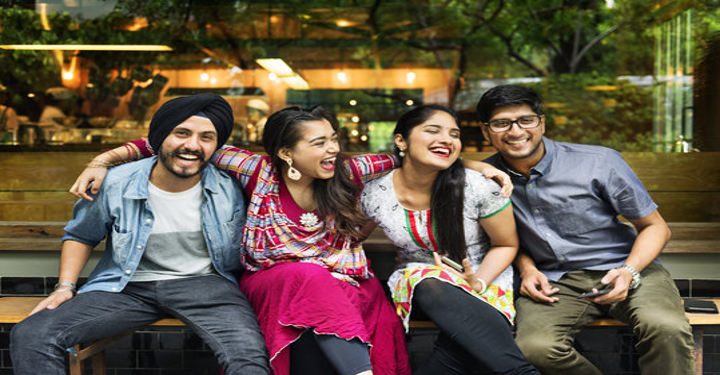

In [6]:
raw_image = Image.open('friends.jpg')
raw_image.resize((720, 375))

In [7]:
output = sam_pipe(raw_image, points_per_batch=32)

In [8]:
from helper import show_pipe_masks_on_image

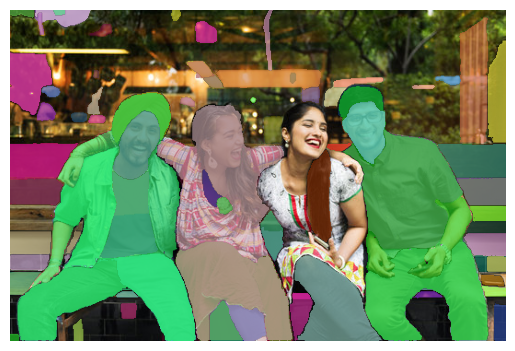

In [9]:
show_pipe_masks_on_image(raw_image, output)

In [10]:
from transformers import SamModel, SamProcessor

In [11]:
model = SamModel.from_pretrained(
    "./models/Zigeng/SlimSAM-uniform-77")

processor = SamProcessor.from_pretrained(
    "./models/Zigeng/SlimSAM-uniform-77")

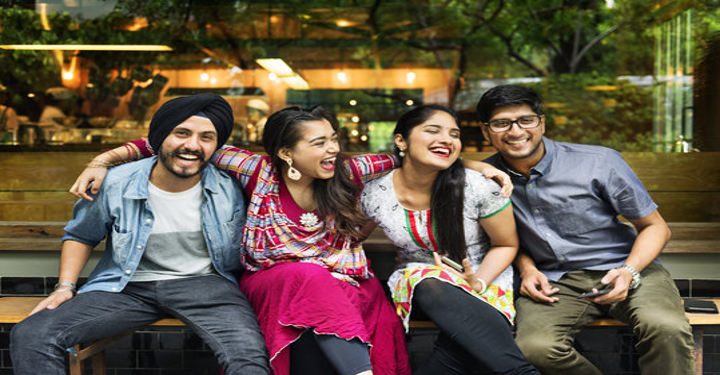

In [12]:
raw_image.resize((720, 375))

In [13]:
input_points = [[[1600, 700]]]

In [14]:
inputs = processor(raw_image,
                 input_points=input_points,
                 return_tensors="pt")

In [15]:
import torch

In [16]:
with torch.no_grad():
    outputs = model(**inputs)

In [17]:
predicted_masks = processor.image_processor.post_process_masks(
    outputs.pred_masks,
    inputs["original_sizes"],
    inputs["reshaped_input_sizes"]
)

In [18]:
len(predicted_masks)

1

In [19]:
predicted_mask = predicted_masks[0]
predicted_mask.shape

torch.Size([1, 3, 360, 539])

In [20]:
outputs.iou_scores

tensor([[[0.3527, 0.5645, 0.2131]]])

In [21]:
from helper import show_mask_on_image

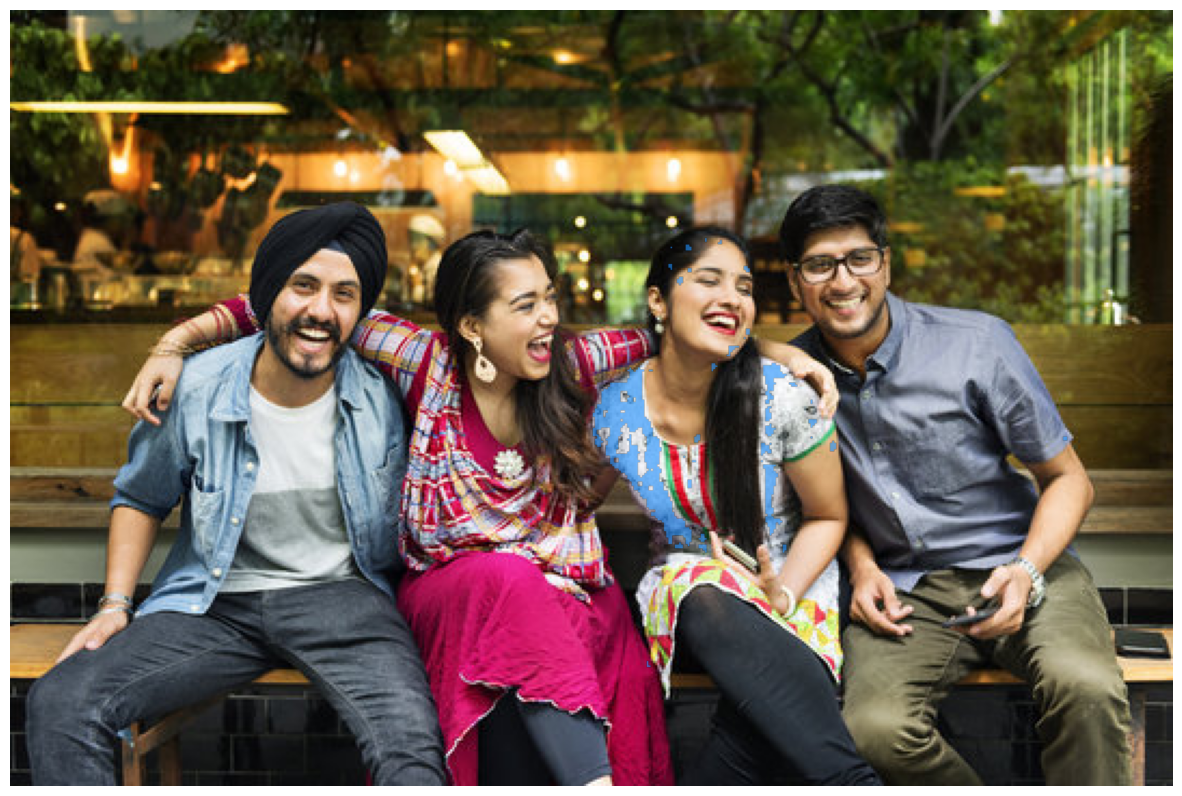

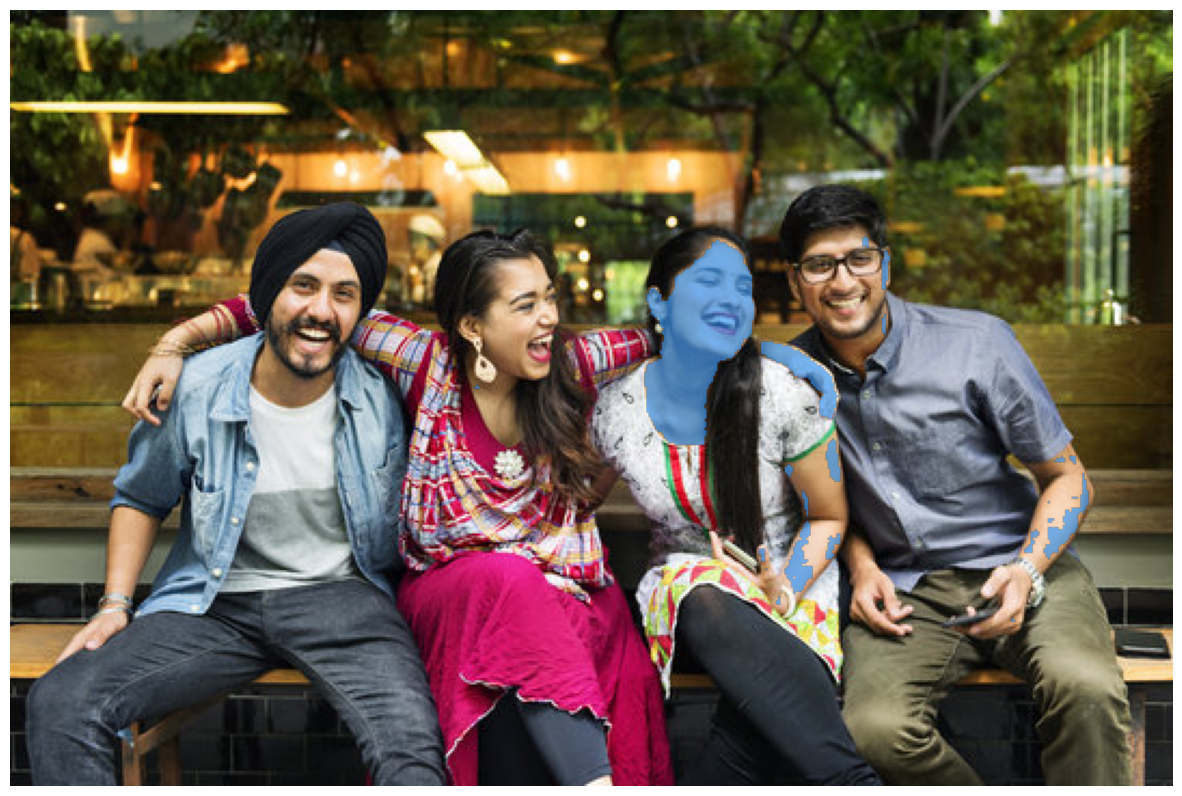

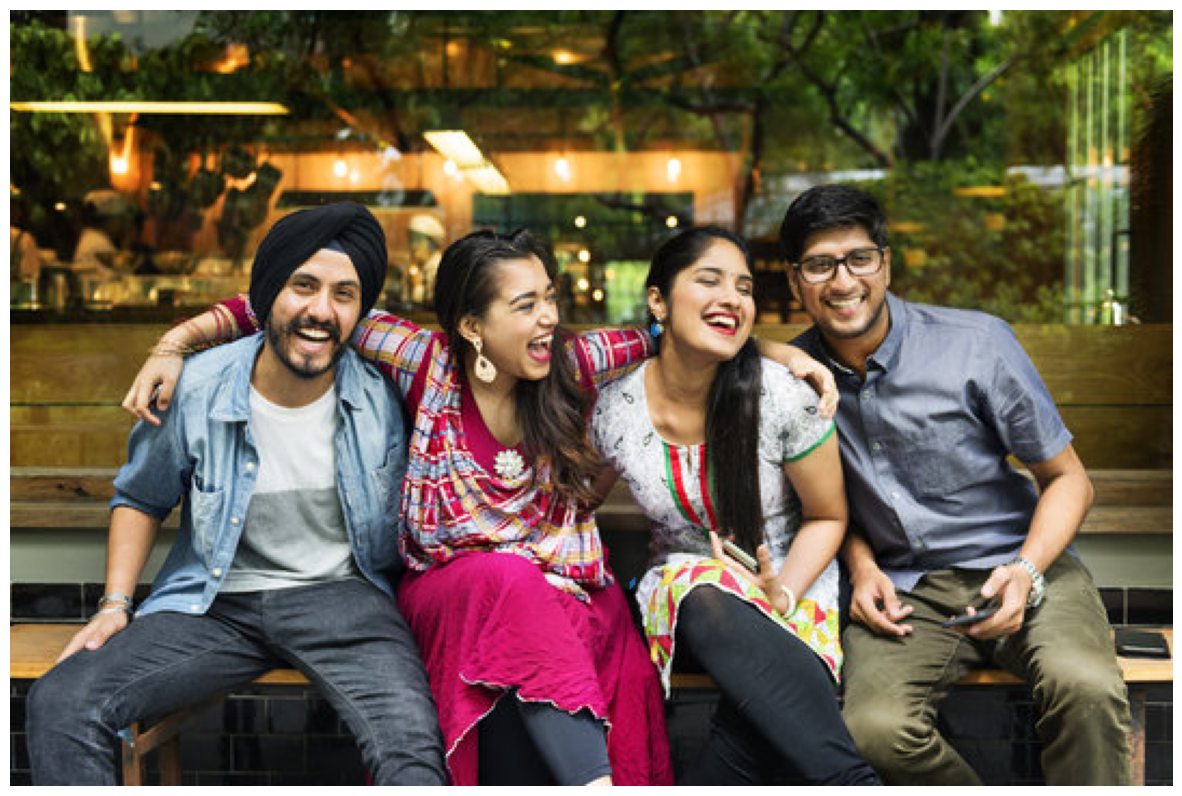

In [22]:
for i in range(3):
    show_mask_on_image(raw_image, predicted_mask[:, i])